# Perceptron Lab





In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import copy

## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- A way to create a random train/test split. Write your own. In the future you can use the scikit-learn version if you want.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and include your final weights in your report PDF.

In [128]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None, set_epochs=None, unchanged_threshold=2):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
#         self.initial_weights = self.initialize_weights() if not initial_weights else initial_weights
        self.initial_weights = initial_weights
        self.misclassifications = []
        weights = self.initial_weights
        bias = np.ones((X.shape[0],1))
        inputs = np.hstack((X,bias))
        done = False
        epoch = 1
        not_changed = 0
        scores = []
        while(not done):
            for i, row in enumerate(inputs):
                net = 0.
                for j, inp in enumerate(row):
                    net += inp*weights[j]
#                 print(f"NET={net} TARGET={float(y[i])}")
                if net <= 0.:
                    output = 0
                else:
                    output = 1
                if output != float(y[i]):
                    for j, w in enumerate(weights):
                        delta = self.lr*(float(y[i]) - output)*row[j]
                        weights[j] += delta
                self.weights = weights
            score = self.score(X, y)
            misclassification = 1 - score
            self.misclassifications.append(misclassification)
#             print(score)
            scores.append(score)
            if len(scores) >= 2:
                if scores[-1] == scores[-2]:
                    not_changed += 1
                else:
                    not_changed = 0
            else:
                not_changed = 0
            if not_changed == unchanged_threshold:
                done = True
            epoch += 1
            if set_epochs is not None and epoch > set_epochs:
                done = True
            if self.shuffle:
                X, y = self._shuffle_data(X, y)
                bias = np.ones((X.shape[0],1))
                inputs = np.hstack((X,bias))
        print(f"Took {epoch} Epochs")
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
#         print("WEIGHTS:", self.weights)
        bias = np.ones((X.shape[0],1))
        inputs = np.hstack((X,bias))

        predictions = np.zeros(X.shape[0])
        for idx, row in enumerate(inputs):
            net = 0
            for j, inp in enumerate(row):
                net += inp*self.weights[j]
            if net <= 0:
                predictions[idx] = 0
            else:
                predictions[idx] = 1
        return predictions
            
                

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X)
        num_correct = 0
        total = X.shape[0]
        for idx, pred in enumerate(predictions):
            if pred == float(y[idx]):
                num_correct += 1
        score = num_correct/total
#         print("SCORE:", score)
        return score

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        shuffled = np.concatenate((X, np.atleast_2d(y).T), 1)
        np.random.shuffle(shuffled)
        new_X, new_y = np.split(shuffled,  [-1], axis=1)
        return new_X, new_y.flatten()
    
    def train_test_split(self, X, y, split):
        X, y = self._shuffle_data(X, y)
#         print(X.shape)
        split_index = int(X.shape[0]*split)
        train_X = X[:split_index, :]
        train_y = y[:split_index]
        test_X = X[split_index:, :]
        test_y = y[split_index:]
        return train_X, train_y, test_X, test_y

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights
    
    def get_misclassifications(self):
        return self.misclassifications

## 1.1 Debug 

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Parameters:

Learning Rate = 0.1\
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it]\
Shuffle = False\
Initial Weights = All zeros

---

Expected Results

Accuray = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [8]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output perceptron_debug.arff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0    701      0 --:--:-- --:--:-- --:--:--   701


In [45]:
# Load debug data
data = arff.loadarff('perceptron_debug.arff')
df = pd.DataFrame(data[0])
# display(df)
np_inputs = np.array(df[['a1', 'a2']])
np_targets = np.array(df['class'])
# print(np_inputs)
# print(np_targets)
# Train on debug data
classifier = PerceptronClassifier(lr=.1, shuffle=False)
# classifier._shuffle_data(np_inputs, np_targets)
classifier.fit(np_inputs, np_targets, np.array([0.,0.,0.]), set_epochs=10)

# Check weights
print(classifier.get_weights())
print(classifier.score(np_inputs, np_targets))

Took 11 Epochs
[-0.23  0.18 -0.1 ]
0.875


## 1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff)

In [195]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output perceptron_eval.arff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0  85818      0 --:--:-- --:--:-- --:--:-- 85818   0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [50]:
# Load evaluation data
data = arff.loadarff('perceptron_eval.arff')
df = pd.DataFrame(data[0])
# display(df)
np_inputs = np.array(df[['variance_wavelet', 'skewness_wavelet', 'curtosis_wavelet', 'entropy_wavelet']])
np_targets = np.array(df['class'])
# Train on evaluation data
classifier = PerceptronClassifier(lr=.1, shuffle=False)
classifier.fit(np_inputs, np_targets, np.array([0., 0., 0., 0., 0.]))

# Print weights
print(classifier.get_weights())
print(classifier.score(np_inputs, np_targets))

Took 62 Epochs
[-8.26501742 -5.999081   -6.5894754  -0.4859535  11.4       ]
0.9919825072886297


## 2. (10%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Graph each dataset

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

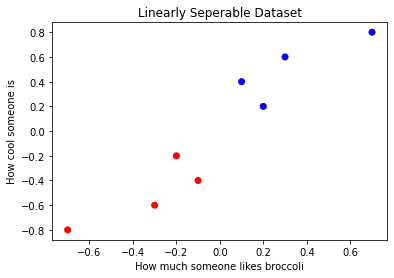

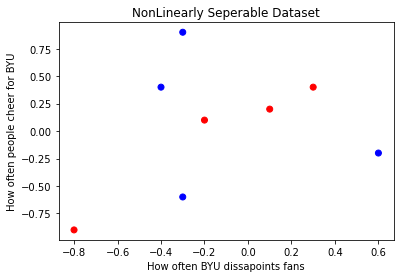

In [46]:
# Create 2 datasets
lin_sep_dataset = np.array([[-.2, -.2, 0], [-.1, -.4, 0], [-.3, -.6, 0], [-.7, -.8, 0], 
                            [.2, .2, 1], [.1, .4, 1], [.3, .6, 1], [.7, .8, 1]])
lin_color = ['red' if l == 0 else 'blue' for l in lin_sep_dataset[:,2]]
plt.title('Linearly Seperable Dataset')
plt.xlabel('How much someone likes broccoli')
plt.ylabel('How cool someone is')
plt.scatter(lin_sep_dataset[:, 0], lin_sep_dataset[:, 1], color=lin_color)
plt.show()

other_dataset = np.array([[-.2, .1, 0], [.1, .2, 1], [.3, .4, 0], [-.8, -.9, 1], 
                          [-.3, -.6, 0], [.6, -.2, 0], [-.3, .9, 1], [-.4, .4, 1]])
other_color = ['red' if l == 0 else 'blue' for l in lin_sep_dataset[:,2]]
plt.title("NonLinearly Seperable Dataset")
plt.xlabel('How often BYU dissapoints fans')
plt.ylabel('How often people cheer for BYU')
plt.scatter(other_dataset[:, 0], other_dataset[:, 1], color=other_color)
plt.show()

## 3. (10%) Train on both sets with your perceptron code.

- Use a couple different learning rates.


In [79]:
# Train on each dataset
# Linear Dataset
np_inputs = lin_sep_dataset[:, :2]
np_targets = lin_sep_dataset[:, 2]
lin_classifier = PerceptronClassifier(lr=.1, shuffle=True)
lin_classifier.fit(np_inputs, np_targets, np.array([0., 0., 0.]))
print("Linear")
print(lin_classifier.get_weights())
print(lin_classifier.score(np_inputs, np_targets))
print("----------------")
# NonLinear Dataset
np_inputs = other_dataset[:, :2]
np_targets = other_dataset[:, 2]
non_lin_classifier = PerceptronClassifier(lr=.1, shuffle=True)
non_lin_classifier.fit(np_inputs, np_targets, np.array([0., 0., 0.]))
print("NonLinear")
print(non_lin_classifier.get_weights())
print(non_lin_classifier.score(np_inputs, np_targets))


Took 8 Epochs
Linear
[0.03 0.06 0.  ]
1.0
----------------
Took 550 Epochs
NonLinear
[-0.26  0.06  0.1 ]
0.625


Discuss the effect of learning rate, including how many epochs are completed before stopping. (For these cases, learning rate should have minimal effect, unlike with the Backpropagation lab.)


*Discuss learning rate here*

The learning rate really didn't have much effect on the linear dataset (I suspect because the points are very seperated) because no matter how large the step was in the weights it essentially started out correct. For the nonlinear dataset it was very random what effect the learning rate had because it was basically stepping randomly around these points and would get stuck. The learning rate effects how large the perceptron steps when it makes changes to its weights, if the learning rate is very low it can get stuck in local minima without being able to step out, but if the learning rate is too high it steps around to wide and can miss the global minima.


## 4. (10%) Graph the instances and decision line for the two cases above (with LR=.1)
 
 - For all graphs always label the axes!

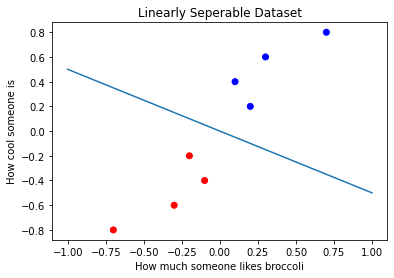

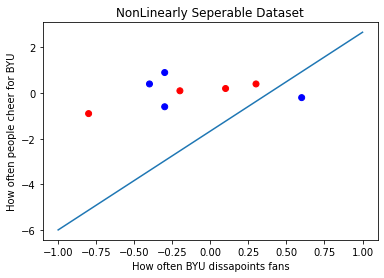

In [80]:
# Graph decision line
# LINEAR
w1, w2, b = lin_classifier.get_weights()
x_1 = np.linspace(-1,1,100)
x_2 = (-w1/w2)*x_1 - b/w2
plt.plot(x_1, x_2)
lin_color = ['red' if l == 0 else 'blue' for l in lin_sep_dataset[:,2]]
plt.title('Linearly Seperable Dataset')
plt.xlabel('How much someone likes broccoli')
plt.ylabel('How cool someone is')
plt.scatter(lin_sep_dataset[:, 0], lin_sep_dataset[:, 1], color=lin_color)
plt.show()

# NON-LINEAR
w1, w2, b = non_lin_classifier.get_weights()
x_1 = np.linspace(-1,1,100)
x_2 = (-w1/w2)*x_1 - b/w2
other_color = ['red' if l == 0 else 'blue' for l in lin_sep_dataset[:,2]]
plt.title("NonLinearly Seperable Dataset")
plt.xlabel('How often BYU dissapoints fans')
plt.ylabel('How often people cheer for BYU')
plt.scatter(other_dataset[:, 0], other_dataset[:, 1], color=other_color)
plt.plot(x_1, x_2)
plt.show()

## 5. (20%) Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/rmorain/CS472-1/master/datasets/perceptron/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 5.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the average of these values for the 5 trials in the table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .969 | .950 | 119 |
| 2 | .972 | .935 | 80 |
| 3 | .957 | .964 | 42 |
| 4 | .975 | .942 | 22 |
| 5 | .963 | .950 | 314 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [82]:
!curl https://raw.githubusercontent.com/rmorain/CS472-1/master/datasets/perceptron/voting-dataset.arff --output voting-dataset.arff

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0  59303      0 --:--:-- --:--:-- --:--:-- 59303


In [131]:
# Create table any way you like
data = arff.loadarff('voting-dataset.arff')
df = pd.DataFrame(data[0])
# decode strings
df = df.apply(lambda x: x.str.decode('utf-8'))
# encode to 0 or 1
df[df == 'n'] = 0
df[df == 'y'] = 1
df[df == 'democrat'] = 0
df[df == 'republican'] = 1
display(df)
np_inputs = np.array(df.iloc[:, 0:-1])
np_targets = np.array(df['Class'])
classifier = PerceptronClassifier(lr=.1, shuffle=True)
train_X, train_y, test_X, test_y = classifier.train_test_split(np_inputs, np_targets, .7)
classifier.fit(train_X, train_y, np.zeros(train_X.shape[1] + 1))

# Print weights
print(classifier.get_weights())
print(classifier.score(train_X, train_y))
print(classifier.score(test_X, test_y))

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0
1,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,1,0,0,0,1,1,1,0,0,1,1,0,0,1,0,1,0
4,1,1,1,1,1,1,0,0,1,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1
457,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0
458,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1
459,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1


Took 71 Epochs
[ 4.00000000e-01 -6.00000000e-01 -1.30000000e+00  3.30000000e+00
  4.00000000e-01 -1.00000000e-01  8.00000000e-01  4.00000000e-01
 -9.00000000e-01  1.30000000e+00 -1.10000000e+00  2.77555756e-17
  4.00000000e-01 -5.00000000e-01 -4.00000000e-01  4.00000000e-01
 -2.00000000e+00]
0.984472049689441
0.935251798561151


### 5.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


The model is learning what input feature are mostly likely to indicate that someone is republican or democrat, based on my results the features most critical for the voting task are: physician-fee-freeze, el-salvador-aid, and export administration-act-south-africa. The least critical by far is: education-spending

### 5.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [132]:
misclassifications = []
for i in range(5):
    train_X, train_y, test_X, test_y = classifier.train_test_split(np_inputs, np_targets, .7)
    classifier.fit(train_X, train_y, np.zeros(train_X.shape[1] + 1))
    misclassifications.append(classifier.get_misclassifications())
    
for i, l in enumerate(misclassifications):
    misclassifications[i] = l[:10]

Took 251 Epochs
Took 102 Epochs
Took 18 Epochs
Took 10 Epochs
Took 143 Epochs


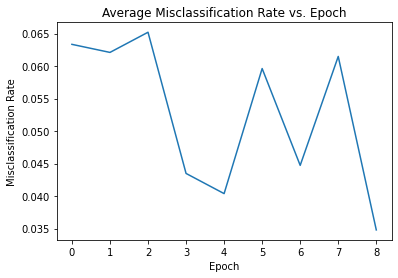

In [135]:
# Graph here
# print(misclassifications)
avg_misclassification_rate = [(g + h + i + j + k) / 5 for g, h, i, j, k in zip(misclassifications[0], misclassifications[1], misclassifications[2], misclassifications[3], misclassifications[4])]

# print(avg_misclassification_rate)

def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()
    
plot_misclassification(avg_misclassification_rate)

## 6. (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above and also one other data set of your choice.

- Report and compare your results.
- Try out some of the hyper-parameters that scikit-learn makes available on your own perceptron.

In [139]:
# Load sklearn perceptron
classifier = Perceptron()
# Train on voting dataset
train_y=train_y.astype(np.float64)
test_y=test_y.astype(np.float64)

classifier.fit(train_X, train_y)
print(classifier.score(train_X, train_y))
print(classifier.score(test_X, test_y))

0.9751552795031055
0.9424460431654677


It actually drops in and works just like the classifier I wrote which is pretty cool, I'm sure under the hood it is way more efficient and powerful but it is cool to see I essentially built the same classifier. One note is that it seems like it over tunes on the training set more than my classifier but that is probably just due to hyperparameters

## 7. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.